## Task1

In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('OnlineRetail.csv', encoding = "ISO-8859-1")
df_orders = pd.read_csv('orders.csv')



In [53]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceYearMonth'] = df['InvoiceDate'].map(lambda date: 100*date.year + date.month)
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [54]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue
209551,555249,23179,CLOCK MAGNET MUM'S KITCHEN,6,2011-06-01 14:57:00,2.89,17472.0,United Kingdom,201106,17.34
303633,563549,22679,FRENCH BLUE METAL DOOR SIGN 4,1,2011-08-17 12:34:00,2.46,NaN,United Kingdom,201108,2.46
463364,576062,22099,CARAVAN SQUARE TISSUE BOX,1,2011-11-13 15:30:00,0.39,12867.0,United Kingdom,201111,0.39
36790,539453,22242,5 HOOK HANGER MAGIC TOADSTOOL,2,2010-12-17 17:08:00,3.36,NaN,United Kingdom,201012,6.72
503682,578931,21755,LOVE BUILDING BLOCK WORD,1,2011-11-27 12:40:00,6.25,16942.0,United Kingdom,201111,6.25


In [55]:
df_fp = df.groupby('CustomerID').InvoiceYearMonth.min().reset_index()
df_fp.columns = ['CustomerID', 'FirstInvoice']

In [56]:
df_fp.sample(5)

,CustomerID,FirstInvoice
902,13539.0,201102
3037,16450.0,201107
2264,15408.0,201103
3774,17469.0,201105
1998,15060.0,201111


In [57]:
df = pd.merge(df, df_fp, how='inner', on='CustomerID')

In [58]:
df.sample(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYearMonth,Revenue,FirstInvoice
355359,577400,22699,ROSES REGENCY TEACUP AND SAUCER,6,2011-11-18 17:20:00,2.95,16201.0,United Kingdom,201111,17.70,201108
295123,549235,22084,PAPER CHAIN KIT EMPIRE,4,2011-04-07 11:16:00,2.95,15530.0,United Kingdom,201104,11.80,201104
137812,567213,22469,HEART OF WICKER SMALL,3,2011-09-19 11:04:00,1.65,14684.0,United Kingdom,201109,4.95,201012
61174,574328,21506,"FANCY FONT BIRTHDAY CARD,",12,2011-11-04 09:05:00,0.42,13081.0,United Kingdom,201111,5.04,201012
165277,558096,21112,SWISS ROLL TOWEL PINK SPOTS,2,2011-06-26 13:24:00,2.95,15532.0,United Kingdom,201106,5.90,201012


In [59]:
df_users = df.groupby(['CustomerID', 'FirstInvoice', 'InvoiceYearMonth'])\
    .agg({'Revenue':'sum', 'InvoiceNo':'count'}).reset_index()

In [60]:
df_users["month_after_util"] = (df_users["InvoiceYearMonth"]//100 - df_users["FirstInvoice"]//100)*12 +\
                               (df_users["InvoiceYearMonth"]%100 - df_users["FirstInvoice"]%100)

In [42]:
df_users.sample(5)

,CustomerID,FirstInvoice,InvoiceYearMonth,Revenue,InvoiceNo,month_after_util
12091,17593.0,201012,201112,678.20,48,12
4613,14267.0,201103,201103,826.41,31,0
11299,17235.0,201012,201012,341.90,10,0
5278,14539.0,201110,201111,465.35,25,1
9995,16672.0,201103,201104,1281.30,21,1


In [43]:
def get_crosstab(df, value_column):
    df_crosstab = pd.crosstab(df.CustomerID, df.InvoiceYearMonth, values=df[value_column], aggfunc=sum)\
        .reset_index()
    df_crosstab = pd.merge(df_crosstab, df_fp, how='inner', on='CustomerID')
    del df_crosstab['CustomerID']
    return df_crosstab

In [44]:
df_crosstab_revenue = get_crosstab(df_users, 'Revenue')
df_crosstab_invoice = get_crosstab(df_users, 'InvoiceNo')
df_crosstab_revenue

,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112,FirstInvoice
0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201101
1,711.79,475.39,NaN,NaN,636.25,NaN,382.52,NaN,584.91,NaN,1294.32,NaN,224.82,201012
2,892.80,227.44,NaN,NaN,367.00,NaN,NaN,NaN,NaN,310.0,NaN,NaN,NaN,201012
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1757.55,NaN,201111
4,NaN,NaN,334.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,NaN,NaN,NaN,180.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201103
4368,NaN,NaN,NaN,NaN,NaN,NaN,80.82,NaN,NaN,NaN,NaN,NaN,NaN,201106
4369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.76,NaN,NaN,NaN,77.84,201108
4370,NaN,215.00,102.9,NaN,117.68,99.47,307.53,143.19,NaN,134.9,114.65,651.56,208.00,201101


In [47]:
def get_retention(df):
    df_triangle = df.groupby(['FirstInvoice']).sum().reset_index()
    df_triangle['Base'] = np.diag(df_triangle.iloc[:,1:])
    df_retention = pd.DataFrame(df_triangle[['FirstInvoice', 'Base']])
    df_retention.columns = ['Cohort', 'Base']

    for col in df_triangle.columns[1:-1]:
        df_retention[col] = round(df_triangle[col] / df_triangle['Base'], 3)

    for i in range(2, len(df_retention.columns)):
        df_retention.iloc[i-1:, i] = None
        
    return df_retention

In [48]:
revenue_retention = get_retention(df_crosstab_revenue)
invoice_retention = get_retention(df_crosstab_invoice)

In [49]:
revenue_retention

,Cohort,Base,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,201012,554604.020,1.0,0.49,0.416,0.545,0.362,0.580,0.564,0.548,0.561,0.841,0.791,0.921,0.330
1,201101,203457.860,NaN,1.00,0.276,0.306,0.204,0.405,0.413,0.345,0.358,0.366,0.512,0.600,0.137
2,201102,149521.380,NaN,NaN,1.000,0.169,0.251,0.307,0.239,0.208,0.319,0.373,0.347,0.405,0.063
3,201103,189930.080,NaN,NaN,NaN,1.000,0.139,0.283,0.212,0.246,0.202,0.319,0.325,0.344,0.059
4,201104,119764.251,NaN,NaN,NaN,NaN,1.000,0.241,0.208,0.199,0.217,0.248,0.236,0.283,0.053
5,201105,115858.740,NaN,NaN,NaN,NaN,NaN,1.000,0.152,0.163,0.154,0.230,0.284,0.271,0.092
6,201106,92526.510,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.147,0.150,0.323,0.279,0.430,0.086
7,201107,65882.871,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.169,0.234,0.261,0.293,0.092
8,201108,77658.230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.246,0.426,0.514,0.182
9,201109,153278.591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.168,0.234,0.080


In [50]:
invoice_retention

,Cohort,Base,201012,201101,201102,201103,201104,201105,201106,201107,201108,201109,201110,201111,201112
0,201012,26850.0,1.0,0.405,0.342,0.451,0.376,0.470,0.441,0.446,0.446,0.558,0.535,0.857,0.276
1,201101,11031.0,NaN,1.000,0.217,0.278,0.215,0.347,0.300,0.261,0.269,0.360,0.469,0.592,0.137
2,201102,8788.0,NaN,NaN,1.000,0.169,0.220,0.278,0.252,0.234,0.251,0.303,0.338,0.334,0.049
3,201103,11151.0,NaN,NaN,NaN,1.000,0.133,0.224,0.213,0.218,0.191,0.251,0.320,0.379,0.088
4,201104,7320.0,NaN,NaN,NaN,NaN,1.000,0.196,0.182,0.177,0.191,0.285,0.264,0.303,0.073
5,201105,6087.0,NaN,NaN,NaN,NaN,NaN,1.000,0.184,0.146,0.151,0.245,0.385,0.320,0.132
6,201106,5652.0,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.166,0.130,0.268,0.305,0.443,0.110
7,201107,5024.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.104,0.269,0.276,0.366,0.105
8,201108,4822.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.333,0.596,0.577,0.188
9,201109,8343.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000,0.298,0.326,0.105


### Что мне не нравится?
1. Retention считается по деньгам и заказам, но не по активным клиентам. Это конечно тоже имеет смысл делать, так как в конечном итоге мы зарабатываем деньги, но сейчас нам интереснее посмотрет на отток клиентов. 
2. Привычнее смотреть на нижнетреугольную матрицу

Поэтому посторою две нижнетреугольные матрицы: retention по активным клиентам (клиент считается активным, если была хотя бы одна покупка в месяц) и по продажам, чтобы сравнить

In [227]:
def get_crosstab_new(df, value_column):
    df_crosstab = pd.crosstab(df.CustomerID, df.month_after_util, values=df[value_column], aggfunc=sum)\
        .reset_index()
    df_crosstab = pd.merge(df_crosstab, df_fp, how='inner', on='CustomerID')
    del df_crosstab['CustomerID']
    return df_crosstab

In [228]:
df_crosstab_revenue_new = get_crosstab_new(df_users, 'Revenue')
df_crosstab_invoice_new = get_crosstab_new(df_users, 'InvoiceNo')
df_crosstab_revenue_new

,0,1,2,3,4,5,6,7,8,9,10,11,12,FirstInvoice
0,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201101
1,711.79,475.39,NaN,NaN,636.25,NaN,382.52,NaN,584.91,NaN,1294.32,NaN,224.82,201012
2,892.80,227.44,NaN,NaN,367.00,NaN,NaN,NaN,NaN,310.00,NaN,NaN,NaN,201012
3,1757.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201111
4,334.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,180.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201103
4368,80.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201106
4369,98.76,NaN,NaN,NaN,77.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,201108
4370,215.00,102.90,NaN,117.68,99.47,307.53,143.19,NaN,134.90,114.65,651.56,208.0,NaN,201101


In [384]:
def get_retention_sum(df):
    df_triangle = df.groupby(['FirstInvoice']).sum().reset_index()
    df_triangle['Base'] = df_triangle.iloc[:, 1]
    # df_triangle.iloc[:, 1:]/np.array(df_triangle['Base']).reshape(13, 1)
    df_retention = df_triangle
    df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/np.array(df_triangle['Base']).reshape(13, 1)
    return df_retention

def get_retention_nunique(df):
    df_triangle = df.groupby(['FirstInvoice']).nunique('CistomerID').reset_index()
    df_triangle['Base'] = df_triangle.iloc[:, 1]
    df_retention = df_triangle
    df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/np.array(df_triangle['Base']).reshape(13, 1)
    return df_retention

Посмотрим на retention по активным клиентам

In [523]:
df = get_retention_nunique(df_crosstab_invoice_new)
df

/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/151659745.py:13: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/np.array(df_triangle['Base']).reshape(13, 1)


,FirstInvoice,0,1,2,3,4,5,6,7,8,9,10,11,12,Base
0,201012,1.0,0.702479,0.694215,0.801653,0.685950,0.785124,0.785124,0.743802,0.785124,0.818182,0.809917,0.966942,0.619835,121
1,201101,1.0,0.522727,0.579545,0.568182,0.681818,0.636364,0.590909,0.613636,0.715909,0.772727,0.818182,0.420455,0.000000,88
2,201102,1.0,0.541667,0.527778,0.625000,0.597222,0.638889,0.625000,0.666667,0.708333,0.680556,0.305556,0.000000,0.000000,72
3,201103,1.0,0.418605,0.546512,0.546512,0.569767,0.511628,0.616279,0.732558,0.720930,0.337209,0.000000,0.000000,0.000000,86
4,201104,1.0,0.459459,0.527027,0.472973,0.459459,0.608108,0.608108,0.581081,0.256757,0.000000,0.000000,0.000000,0.000000,74
5,201105,1.0,0.469697,0.469697,0.424242,0.560606,0.636364,0.621212,0.348485,0.000000,0.000000,0.000000,0.000000,0.000000,66
6,201106,1.0,0.447761,0.388060,0.537313,0.507463,0.805970,0.268657,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67
7,201107,1.0,0.348485,0.424242,0.469697,0.560606,0.272727,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,66
8,201108,1.0,0.353846,0.461538,0.461538,0.276923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65
9,201109,1.0,0.532468,0.688312,0.324675,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77


In [524]:
df = df.replace(0, np.nan)

Text(0.5, 1.0, 'Retention')

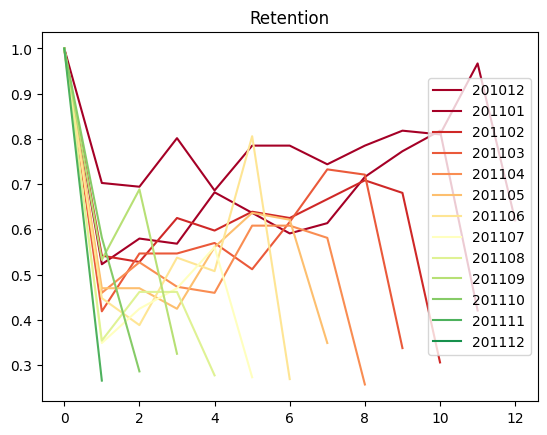

In [387]:

cmap = cm.get_cmap('RdYlGn', df.shape[0])
norm = Normalize(vmin=1,vmax=df.shape[0])

for i in range(df.shape[0]):
    plt.plot(df.iloc[i, 1:-1], color=cmap(norm(i)), label = df.FirstInvoice[i])

plt.legend()
plt.title("Retention")


# plt.plot(df.iloc[:, 1:-1].T, "-o")

Хвостики, загибающиеся вниз из за того, что месяц не коночился можно подрезать. Но сути это не меняет. Retention стабильно ухудшается от месяца к месяцу. При этом это нельзя объяснить какими то маркетинговыми активностями, увеличивающими кол-во новых клиентов и ухудшающих качестве, что видно из абсолютных значений Base. Из хороших новостей - плато достигается за 1 месяц! 

In [521]:
import seaborn as sns

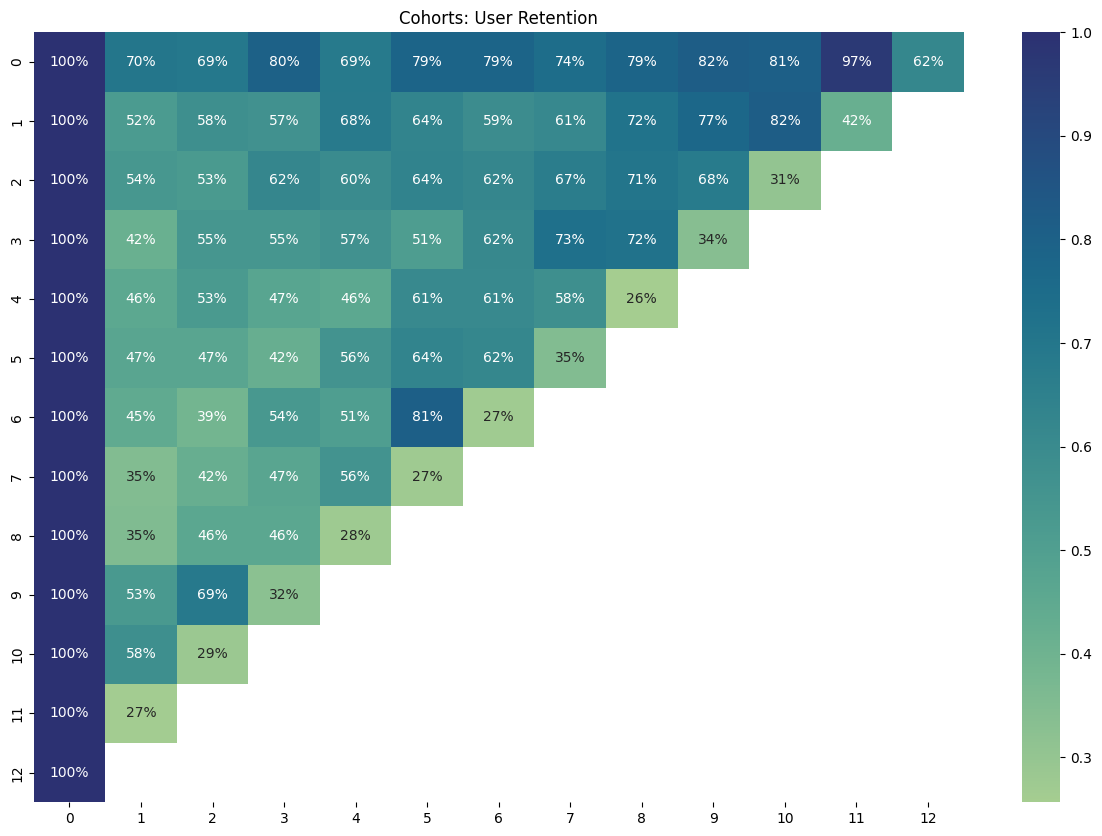

In [534]:


plt.figure(figsize=(15, 10))
plt.title('Cohorts: User Retention')
sns.heatmap(df.iloc[:, 1:-1], mask=df.iloc[:, 1:-1].isnull(), annot=True, fmt='.0%',  cmap="crest");

In [388]:
df = get_retention_sum(df_crosstab_revenue_new)
df

,FirstInvoice,0,1,2,3,4,5,6,7,8,9,10,11,12,Base
0,201012,1.0,0.489749,0.416254,0.545451,0.362291,0.579894,0.564176,0.547972,0.560549,0.841286,0.791260,0.921346,0.329631,554604.020
1,201101,1.0,0.276070,0.306033,0.204053,0.404572,0.412909,0.345126,0.358238,0.365828,0.512053,0.599766,0.136886,0.000000,203457.860
2,201102,1.0,0.168941,0.250508,0.306661,0.238539,0.207875,0.318786,0.373459,0.346850,0.404924,0.062644,0.000000,0.000000,149521.380
3,201103,1.0,0.138910,0.282704,0.212310,0.246196,0.201971,0.319182,0.324886,0.343831,0.059244,0.000000,0.000000,0.000000,189930.080
4,201104,1.0,0.241483,0.208143,0.199493,0.217148,0.247597,0.235662,0.282971,0.052537,0.000000,0.000000,0.000000,0.000000,119764.251
5,201105,1.0,0.152461,0.162928,0.154403,0.229517,0.284411,0.271036,0.091741,0.000000,0.000000,0.000000,0.000000,0.000000,115858.740
6,201106,1.0,0.147194,0.150156,0.323421,0.279225,0.429761,0.085658,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,92526.510
7,201107,1.0,0.168880,0.233683,0.261411,0.293385,0.091923,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65882.871
8,201108,1.0,0.246239,0.425732,0.514112,0.182121,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,77658.230
9,201109,1.0,0.168279,0.233550,0.080065,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,153278.591


In [389]:
df = df.replace(0, np.nan)

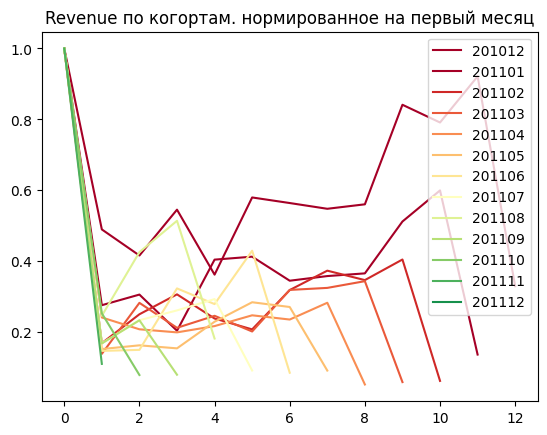

In [390]:
cmap = cm.get_cmap('RdYlGn', df.shape[0])
norm = Normalize(vmin=1,vmax=df.shape[0])

for i in range(df.shape[0]):
    plt.plot(df.iloc[i, 1:-1], color=cmap(norm(i)), label = df.FirstInvoice[i])

    
plt.title("Revenue по когортам. нормированное на первый месяц")
plt.legend()
# plt.plot(df.iloc[:, 1:-1].T, "-o")

Две самые старые когорты сильно и равномерно по времени (после 2-3 месяца) растут по объемам продаж. То есть клиенты, вышедшие на плато, начинают заказывать на большие суммы. Аналогичный, но более слабый эффект у других когорт. Самый резкий рост у всех когорт наблюдается в предпоследний месяц - ноябрь. Черная пятница?

## Task 2

In [391]:
df_orders = pd.read_csv('orders.csv')
df_orders['order_month'] = df_orders['order_date'].apply(lambda x: x[0:7])
df_orders['order_year'] = df_orders['order_date'].apply(lambda x: x[0:4])

In [392]:
df_customers = pd.read_csv('customers.csv')
cols = ['customer_id']
cols.extend(df_customers.columns[1:])
df_customers.columns = cols

In [393]:
df_orders.sample(5)

,id,order_date,ship_mode,customer_id,sales,order_month,order_year
3638,142125,2017-10-21,Standard,JB-15400,60.720,2017-10,2017
1807,107202,2016-05-21,Standard,LC-16930,2396.400,2016-05,2016
4479,160857,2015-05-08,Standard,NW-18400,3384.518,2015-05,2015
3483,133928,2017-06-11,Standard,ZC-21910,4.572,2017-06,2017
4745,105830,2016-12-31,First,DB-13660,156.512,2016-12,2016


In [394]:
df_customers.sample(5)

,customer_id,name,segment,state,city
547,JC-15775,John Castell,Consumer,Texas,San Antonio
690,PT-19090,Pete Takahito,Consumer,Texas,Houston
102,JB-15925,Joni Blumstein,Consumer,Ohio,Dublin
436,LD-17005,Lisa DeCherney,Consumer,California,San Francisco
405,LH-16750,Larry Hughes,Consumer,North Carolina,Charlotte


In [395]:
df_merge = pd.merge(df_orders, df_customers, 'inner', on='customer_id')

In [396]:
df_merge.sample(5)

,id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city
2343,154823,2015-08-21,Standard,KN-16390,637.270,2015-08,2015,Katherine Nockton,Corporate,California,Los Angeles
2962,103443,2017-12-17,Standard,AT-10735,315.896,2017-12,2017,Annie Thurman,Consumer,Washington,Seattle
733,114034,2017-01-03,Standard,DL-13315,38.880,2017-01,2017,Delfina Latchford,Consumer,New York,New York City
2895,164042,2017-05-23,Standard,KL-16645,70.148,2017-05,2017,Ken Lonsdale,Consumer,Illinois,Chicago
1904,110289,2015-10-29,Standard,NB-18655,244.240,2015-10,2015,Nona Balk,Corporate,Texas,Dallas


In [397]:
df_first = df_merge.groupby('customer_id')['order_year'].min().reset_index()
df_first.columns = ['customer_id', 'first_order']

In [398]:
df_first.sample(5)

,customer_id,first_order
338,IM-15070,2014
410,JW-15220,2015
429,KH-16360,2014
388,JL-15850,2014
366,JG-15310,2016


In [399]:
df_full = pd.merge(df_merge, df_first, 'inner', on='customer_id')

In [400]:
df_full.sample(5)

,id,order_date,ship_mode,customer_id,sales,order_month,order_year,name,segment,state,city,first_order
3978,115924,2015-09-14,Second,BE-11455,25.9000,2015-09,2015,Brad Eason,Home Office,Kansas,Olathe,2015
3622,124303,2017-07-06,Standard,FH-14365,19.0020,2017-07,2017,Fred Hopkins,Corporate,Pennsylvania,Philadelphia,2014
1551,120670,2014-11-02,Standard,JK-16120,799.9200,2014-11,2014,Julie Kriz,Home Office,Illinois,Aurora,2014
4627,155551,2016-04-18,Standard,CR-12580,240.0400,2016-04,2016,Clay Rozendal,Home Office,Illinois,Elmhurst,2016
1607,166863,2014-06-20,Standard,SC-20020,1353.5296,2014-06,2014,Sam Craven,Consumer,Texas,Plano,2014


In [401]:
df_users = df_full.groupby(['customer_id', 'first_order', 'order_year', 'ship_mode', 'segment'])\
    .agg({'sales':'sum', 'id':'count'}).reset_index()

In [402]:
df_users["years_from_first"] = df_users.order_year.map(lambda x: int(x))\
                                - df_users.first_order.map(lambda x: int(x))

In [403]:
df_users.sample(5)

,customer_id,first_order,order_year,ship_mode,segment,sales,id,years_from_first
665,CK-12205,2014,2014,Second,Consumer,18.784,1,0
681,CK-12595,2014,2016,Second,Consumer,29.340,1,2
2367,MH-17455,2014,2017,Standard,Consumer,90.640,1,3
2691,NZ-18565,2014,2017,First,Home Office,151.056,1,3
3670,YC-21895,2014,2016,Standard,Corporate,371.504,1,2


In [404]:
def get_crosstab2(df, value_column):
    df_crosstab = pd.crosstab(df.customer_id, df.years_from_first, values=df[value_column], aggfunc=sum)\
        .reset_index()
    df_crosstab = pd.merge(df_crosstab, df_first, how='inner', on='customer_id')
#     del df_crosstab['customer_id']
    return df_crosstab





In [405]:
get_crosstab2(df_users, 'sales')

,customer_id,0,1,2,3,first_order
0,AA-10315,756.048,26.960,4406.072,374.480,2014
1,AA-10375,50.792,268.578,530.288,206.732,2014
2,AA-10480,27.460,NaN,1747.500,15.552,2014
3,AA-10645,1434.330,1971.460,1668.185,12.960,2014
4,AB-10015,322.216,NaN,563.940,NaN,2014
...,...,...,...,...,...,...
788,XP-21865,1054.794,54.170,816.382,449.312,2014
789,YC-21895,3116.490,15.700,1571.480,750.680,2014
790,YS-21880,1380.180,NaN,5340.264,NaN,2015
791,ZC-21910,1588.746,2994.162,3215.733,227.066,2014


In [504]:
def get_retention(df):
    
    df_triangle = df.iloc[:, 1:].groupby(['first_order']).sum().reset_index()
    df_triangle['Base'] = df_triangle.iloc[:,0]
    df_retention = pd.DataFrame(df_triangle[['first_order', 'Base']])
    df_retention.columns = ['Cohort', 'Base']

    for col in df_triangle.columns[1:-1]:
        df_retention[col] = round(df_triangle[col] / df_triangle['Base'], 3)

    for i in range(2, len(df_retention.columns)):
        df_retention.iloc[i-1:, i] = None
        
    return df_retention


def get_retention_sum2(df):
    df_triangle = df.iloc[:, 1:].groupby(['first_order']).sum().reset_index()
    df_triangle['Base'] = df_triangle.iloc[:,1]
    # df_triangle.iloc[:, 1:]/np.array(df_triangle['Base']).reshape(13, 1)
    df_retention = df_triangle
    df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\
                                    np.array(df_triangle['Base']).reshape(len(df_triangle['Base']), 1)
    return df_retention

def get_retention_nunique2(df):
    df_triangle = df.groupby(['first_order']).nunique('customer_id').reset_index()
    df_triangle['Base'] = df_triangle.iloc[:, 1]
    df_retention = df_triangle
    df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\
                                np.array(df_triangle['Base']).reshape(len(df_triangle['Base']), 1)
    return df_retention

### Retention
(именно по клиентам. нормальный retention)

In [535]:
df = get_retention_nunique2(get_crosstab2(df_users, 'sales'))

/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\


In [536]:
df

,first_order,customer_id,0,1,2,3,Base
0,2014,1.0,0.996639,0.734454,0.815126,0.868908,595
1,2015,1.0,1.000000,0.750000,0.882353,0.000000,136
2,2016,1.0,1.000000,0.882353,0.000000,0.000000,51
3,2017,1.0,1.000000,0.000000,0.000000,0.000000,11


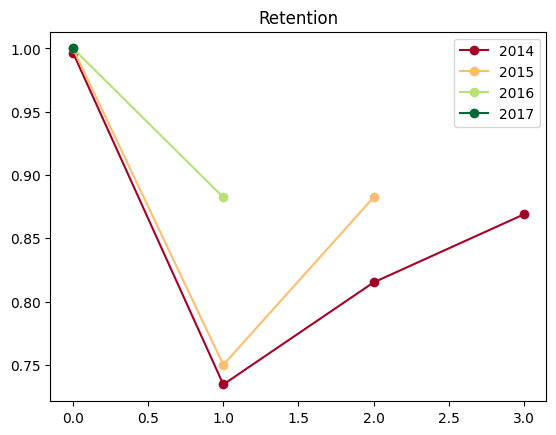

In [537]:
df = df.replace(0, np.nan)
cmap = cm.get_cmap('RdYlGn', df.shape[0])
norm = Normalize(vmin=0,vmax=df.shape[0])

for i in range(df.shape[0]):
    plt.plot(df.iloc[i, 2:-1], "-o",  color=cmap(norm(i)), label = df.first_order[i])

    
plt.title("Retention")
plt.legend()
# plt.plot(df.iloc[:, 1:-1].T, "-o")

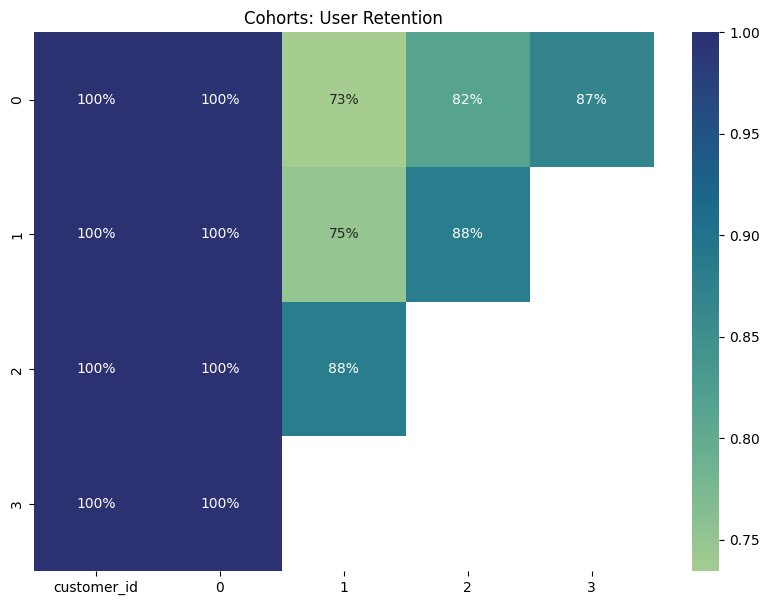

In [539]:

plt.figure(figsize=(10, 7))
plt.title('Cohorts: User Retention')
sns.heatmap(df.iloc[:, 1:-1], mask=df.iloc[:, 1:-1].isnull(), annot=True, fmt='.0%',  cmap="crest");

### Посмотрим в разбивке по сегментам

In [508]:
df_consumers = df_users[df_users.segment == "Consumer"]
df_ret_consumers = get_retention_nunique2(get_crosstab2(df_consumers, 'sales'))
df_ret_consumers = df_ret_consumers.replace(0, np.nan)



df_corporate = df_users[df_users.segment == "Corporate"]
df_ret_corporate = get_retention_nunique2(get_crosstab2(df_corporate, 'sales'))
df_ret_corporate = df_ret_corporate.replace(0, np.nan)


df_office = df_users[df_users.segment == "Home Office"]
df_ret_office = get_retention_nunique2(get_crosstab2(df_office, 'sales'))
df_ret_office = df_ret_office.replace(0, np.nan)



/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\
/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\
/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace 

In [509]:
df_ret_consumers

,first_order,customer_id,0,1,2,3,Base
0,2014,1.0,0.996785,0.742765,0.829582,0.877814,311
1,2015,1.0,1.000000,0.718750,0.890625,NaN,64
2,2016,1.0,1.000000,0.888889,NaN,NaN,27
3,2017,1.0,1.000000,NaN,NaN,NaN,7


In [510]:
df_ret_corporate

,first_order,customer_id,0,1,2,3,Base
0,2014,1.0,1.0,0.703911,0.821229,0.860335,179
1,2015,1.0,1.0,0.820513,0.897436,NaN,39
2,2016,1.0,1.0,0.800000,NaN,NaN,15
3,2017,1.0,1.0,NaN,NaN,NaN,3


In [511]:
df_ret_office

,first_order,customer_id,0,1,2,3,Base
0,2014,1.0,1.0,0.761905,0.761905,0.857143,105
1,2015,1.0,1.0,0.727273,0.848485,NaN,33
2,2016,1.0,1.0,1.000000,NaN,NaN,9
3,2017,1.0,1.0,NaN,NaN,NaN,1


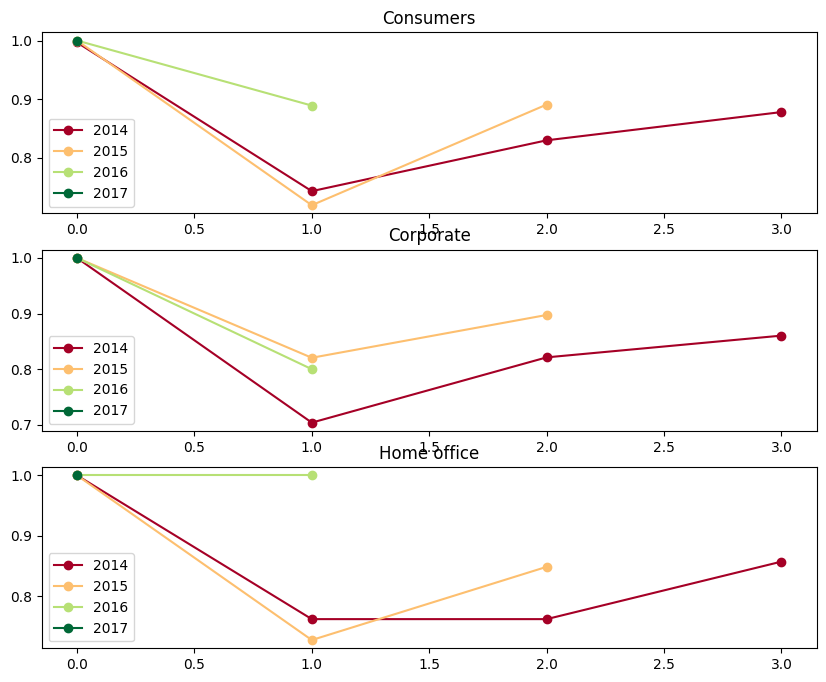

In [512]:

fig, (ax0, ax1, ax2) = plt.subplots(3, 1, figsize=(10, 8),)



for i in range(df.shape[0]):
    ax0.plot(df_ret_consumers.iloc[i, 2:-1], "-o",  color=cmap(norm(i)), label = f"{df.first_order[i]}")
    

for i in range(df.shape[0]):
    ax1.plot(df_ret_corporate.iloc[i, 2:-1], "-o",  color=cmap(norm(i)), label = f"{df.first_order[i]}")
    

for i in range(df.shape[0]):
    ax2.plot(df_ret_office.iloc[i, 2:-1], "-o",  color=cmap(norm(i)), label = f"{df.first_order[i]}")
    
    
ax0.set_title("Consumers")
ax1.set_title("Corporate")
ax2.set_title("Home office")
ax0.legend()
ax1.legend()
ax2.legend()



plt.show()

Особой разницы в динамике retantion различных сегментов не видно. Опять же видим что retention загибается вверх.

### Посмотрим в разбивке по ship_mode

In [513]:
list_of_df = [1]*len(list(pd.unique(df_users.ship_mode)))

for i, mode in enumerate(list(pd.unique(df_users.ship_mode))):
    df = df_users[df_users.ship_mode == mode]
    list_of_df[i] = get_retention_nunique2(get_crosstab2(df, 'sales')).replace(0, np.nan)



/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\
/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df_retention.iloc[:, 1:-1] = df_triangle.iloc[:, 1:-1]/\
/var/folders/hz/sht0027118ng6s795jh0hbs80000gn/T/ipykernel_91089/3825642032.py:30: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace 

In [514]:
list_of_df[0]

,first_order,customer_id,0,1,2,3,Base
0,2014,1.0,0.735945,0.565588,0.635434,0.69506,587
1,2015,1.0,0.729323,0.593985,0.766917,NaN,133
2,2016,1.0,0.869565,0.782609,NaN,NaN,46
3,2017,1.0,1.000000,NaN,NaN,NaN,8


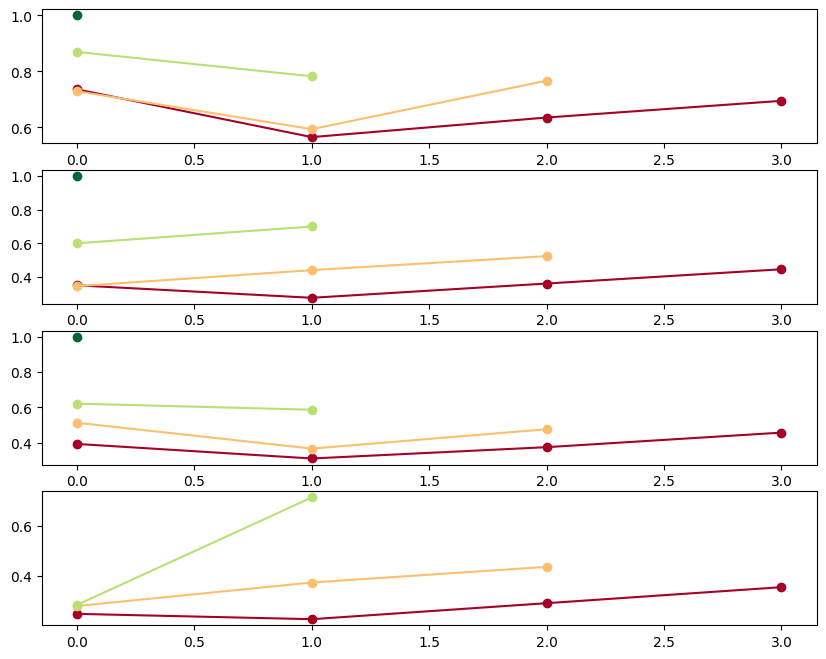

In [515]:

fig, axs = plt.subplots(4, 1, figsize=(10, 8))


for j, ax in enumerate(axs):
    for i in range(list_of_df[j].shape[0]):
        axs[j].plot(list_of_df[j].iloc[i, 2:-1], "-o",  color=cmap(norm(i)))
    


plt.show()

Здесь получается довольно бессмысленная картина, связанная с тем, что разные клиенты из разных когорт могли пользоваться разными доставками в разные периоды своей жизни